#### This notebook consists of four tasks, which will be developed gradually :
1. Permutations and Combinations
2. numpy's Normal Distribution 
3. t-Test Calculation
4. ANOVA


### 1. Permutations and Combinations

This task is based on Lady Tasting Tea experiment created by Ronald Fisher published in The Design of Experiments in 1935.<br>Background: Eight cups of tea were given to a lady who was asked to differentiate between four cups of tea that had milk in first and four cups with tea added first. 

The null hypothesis H<sub>0</sub> of the experiment: The lady couldn't tell the difference between the cups.    

Task:       
- Altering the experiment by using 12 cups of tea instead of 8 with 6 having milk in first and 6 having tea in first where the subject claims to be able to tell the difference between the cups.<br> 
The H<sub>0</sub> remains the same: the subject is not able to distinguish between the cups.      
- Accept one error in the experiment assuming the subject selected 5 correct cups and calculate the probability with H<sub>0</sub> remaining the same     
- Accept two errors and calculate the probability         

In [175]:
# Importing modules
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

In [176]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

In [177]:
# https://docs.python.org/3/library/math.html#math.comb
# Combination represents the number of ways (k) to pick the cups with milk in first without repetition and order from the total number of cups (n)
ways = math.comb(no_cups, no_cups_milk_first)

# Show - there are 924 ways to pick the six cups with the milk in first
ways

924

In [178]:
# Total number of ways of selecting six cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7

# Show.
ways_ordered

665280

In [179]:
# No of ways of shuffling the six cups.
no_shuffles = 6 * 5 * 4 * 3 * 2 * 1

# Show.
no_shuffles

720

In [180]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

924

In [181]:
# The cup labels
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [182]:
# Showing all the ways of selecting no_cups_milk_first out of no_cups cups of tea by using 
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [183]:
# Number of combinations.
len(combs)

924

In [184]:
# Select six cups at random to put milk in first
# https://docs.python.org/3/library/random.html#random.sample
# Different, randomized output each time 
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[1, 2, 3, 6, 7, 10]

In [185]:
# Turn labels_milk into a set - gives unique values 
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{1, 2, 3, 6, 7, 10}

In [186]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {1, 2, 3} 3
(0, 1, 2, 3, 4, 6) {1, 2, 3, 6} 4
(0, 1, 2, 3, 4, 7) {1, 2, 3, 7} 4
(0, 1, 2, 3, 4, 8) {1, 2, 3} 3
(0, 1, 2, 3, 4, 9) {1, 2, 3} 3
(0, 1, 2, 3, 4, 10) {10, 1, 2, 3} 4
(0, 1, 2, 3, 4, 11) {1, 2, 3} 3
(0, 1, 2, 3, 5, 6) {1, 2, 3, 6} 4
(0, 1, 2, 3, 5, 7) {1, 2, 3, 7} 4
(0, 1, 2, 3, 5, 8) {1, 2, 3} 3
(0, 1, 2, 3, 5, 9) {1, 2, 3} 3
(0, 1, 2, 3, 5, 10) {10, 1, 2, 3} 4
(0, 1, 2, 3, 5, 11) {1, 2, 3} 3
(0, 1, 2, 3, 6, 7) {1, 2, 3, 6, 7} 5
(0, 1, 2, 3, 6, 8) {1, 2, 3, 6} 4
(0, 1, 2, 3, 6, 9) {1, 2, 3, 6} 4
(0, 1, 2, 3, 6, 10) {1, 2, 3, 6, 10} 5
(0, 1, 2, 3, 6, 11) {1, 2, 3, 6} 4
(0, 1, 2, 3, 7, 8) {1, 2, 3, 7} 4
(0, 1, 2, 3, 7, 9) {1, 2, 3, 7} 4
(0, 1, 2, 3, 7, 10) {1, 2, 3, 7, 10} 5
(0, 1, 2, 3, 7, 11) {1, 2, 3, 7} 4
(0, 1, 2, 3, 8, 9) {1, 2, 3} 3
(0, 1, 2, 3, 8, 10) {10, 1, 2, 3} 4
(0, 1, 2, 3, 8, 11) {1, 2, 3} 3
(0, 1, 2, 3, 9, 10) {10, 1, 2, 3} 4
(0, 1, 2, 3, 9, 11) {1, 2, 3} 3
(0, 1, 2, 3, 10, 11) {10, 1, 2, 3} 4
(0, 1, 2, 4, 5, 6) {1, 2, 6} 3
(0, 1, 2, 4, 5, 7

In [187]:
# Show the overlaps.
print(no_overlaps)

[3, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 5, 4, 4, 5, 4, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 3, 2, 2, 3, 2, 4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 1, 2, 1, 2, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 2, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 2, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 1, 2, 1, 2, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 2, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 2, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 3, 2, 

In [188]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

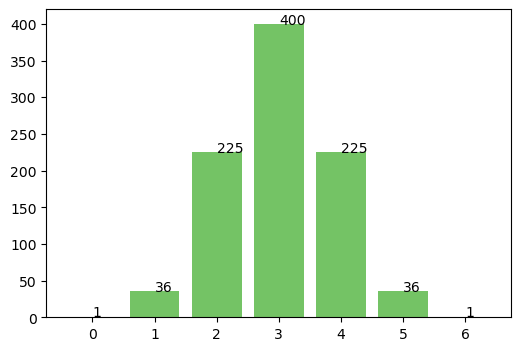

In [189]:
def addlabels(x,y):
    for i in range(len(x)):
        ax.text(i,y[i],y[i])

# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1], color='#74C365');
addlabels(counts[0], counts[1])

In [190]:
# The probability that she (randomly) selects at most five correct cups and 1 wrong
37/924

0.04004329004329004

In [191]:
# The probability that she (randomly) selects at most four correct cups (at most 2 wrong).
(225+36+1)/924

0.28354978354978355

The probability of the lady picking at most five correct and one wrong cup is very small, 4% and there is a high chance she will make another mistake if she chooses the cups again. The probability of the lady picking at most two wrong and four correct cups is higher, 28% which is why we would accept two errors. 

#### Sources: 
<https://github.com/ianmcloughlin/2425_applied_statistics>


### 2. numpy's Normal Distribution 


The purpose of this task is to check if numpy.random.normal() is generating normal values for 100 000 values where μ=10.0 and σ=3.0. To check if the sample came from the normal distribution scipy.stats.shapiro() test was used, while the histogram and the normal distribution probability density function were plotted for data visualisation. 

In [192]:
# Libraries necessary for generating and testing normal distribution
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Needed for Shapiro-Wilk test and probability density function
import scipy.stats as stats
from scipy.stats import norm

# Statistics modules
import statsmodels.api as sm

Documentation on generating a random sample from a normal distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal

In [193]:
# Generating a sample of 100 000 values with μ=10.0 and σ=3.0 
sample = np.random.normal(loc=10.0, scale=3.0, size=100000)

# Show sample
sample

array([11.73720707,  6.63529287,  9.61423036, ...,  9.91544614,
        5.55948736, 10.96979074])

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist
https://matplotlib.org/stable/api/figure_api.html  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


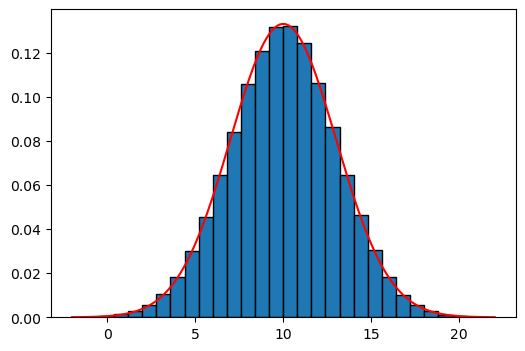

In [194]:
# Histogram of our sample data
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(sample, edgecolor='black', density="True", bins=np.linspace(-2, 22, 31))

# Probability density function plotted over histogram
x = np.linspace(-2, 22, 300)
pdf = norm.pdf(x, loc=10.0, scale=3.0)
ax.plot(x, pdf, 'r-')

#### Q-Q probability plot


Q-Q plot was used to compare distributions using their quantiles to see if they share a similar shape. In our example, we tested data against the normal distribution, and according to the result visible from the plot, our sample data is following a normal distribution. 


https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html#scipy.stats.probplot   



((array([-4.34602155, -4.14724578, -4.03913009, ...,  4.03913009,
          4.14724578,  4.34602155]),
  array([-2.69047722, -1.46050137, -1.41927348, ..., 22.09454365,
         22.15558428, 22.44685968])),
 (3.003546039214997, 10.00999460622478, 0.9999822852001442))

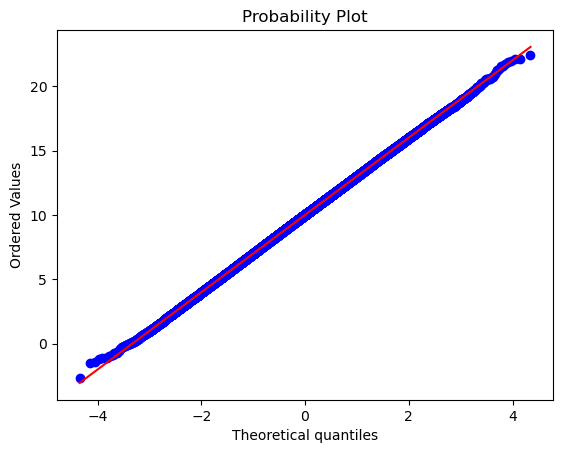

In [195]:
fig, ax = plt.subplots()

# Q-Q plot
stats.probplot(sample, dist='norm', plot=ax)

https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/   
https://stats.stackexchange.com/questions/585566/what-are-the-main-difference-between-a-qq-plot-and-a-probability-plot-for-measur    

Using a regression line to visualise the shape of data compared to a normal distribution.

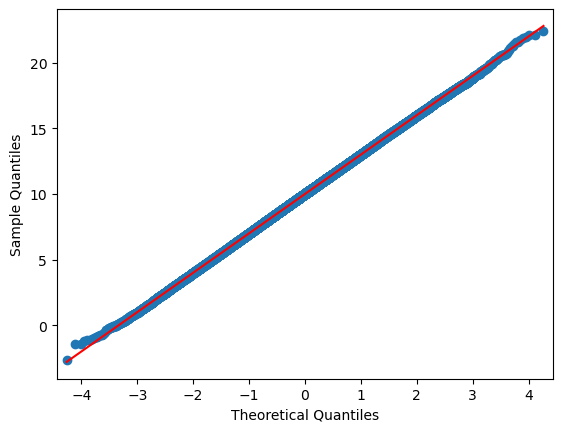

In [196]:
sm.qqplot(sample, line='r')
plt.show()

#### Testing the normality using Shapiro-Wilk test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html  
https://medium.com/@maizi5469/10-0-shapiro-wilk-test-5be38fd3c2a6  
https://builtin.com/data-science/shapiro-wilk-test  



To assess if data came from a normal distribution, we use Shapiro-Wilk test.    
H<sub>0</sub>: data was drawn from a normal distribution.   
If the pvalue<0.05, we reject H<sub>0</sub>, otherwise we do not reject it, and assume the sample was pulled from the normal distribution. 

In [197]:
stats.shapiro(sample)

c:\Users\tanju\Downloads\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9999611890633923, pvalue=0.3166318968891022)

Since the pvalue is above 0.05, we do not reject H<sub>0</sub>, and we can assume data has been drawn from a normal distribution.

### 3. t-Test Calculation

https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter   

The purpose of this task is to compare two groups of resting heart rate for patients before and after participating in two-weeks exercise program by calculating t-statistics and comparing it to the value given by scipy.stats.  

| Patient ID | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |    
| Before | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |  
| After | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 | 
    


H<sub>0</sub>: There is no statistically significant difference between the resting heart rate for patients before and after participating in two weeks exercise program.


In [198]:
# Libraries imported in order to complete the task repeat throughout the notebook, but we imported them again to follow the task easier

# Numerical data
import numpy as np

# Statistical functions
import scipy.stats as stats

# Data frames
import pandas as pd

# Plots
import matplotlib.pyplot as plt

# Statistical data visualization  
import seaborn as sns 

https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/  

In [199]:
# Creating two arrays with patients resting heart rate before and after the exercise  
rate_before_exercise = [63, 68, 70, 64, 74, 67, 70, 57, 66, 65]
rate_after_exercise = [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]

Text(0.5, 1.0, 'Before exercise program')

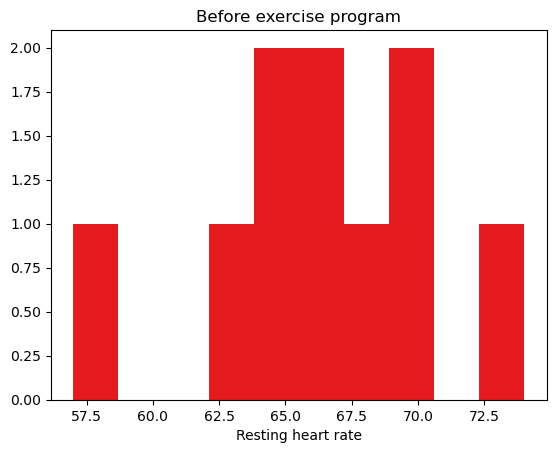

In [200]:
# Plot a heart rate before exercise from the array values
plt.hist(rate_before_exercise, color='#e41a1c')

# Add a label to the x-axis
plt.xlabel("Resting heart rate")

# Add a title to the plot
plt.title("Before exercise program")

Using a Q-Q plot test if the values for heart rate before exercise follow the shape of a normal distribution. 

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([57, 63, 64, 65, 66, 67, 68, 70, 70, 74])),
 (4.949244060506478, 66.4, 0.9769703507031055))

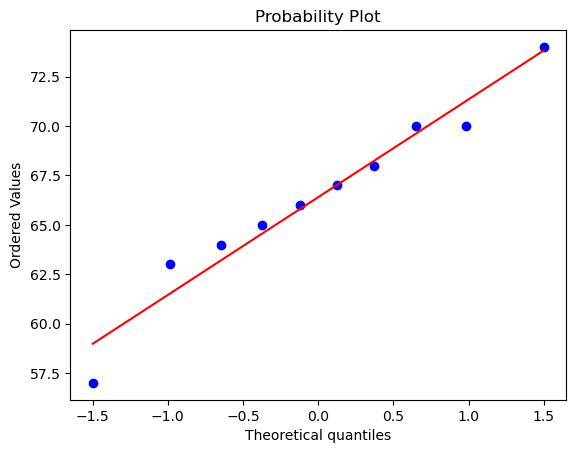

In [201]:
fig, ax = plt.subplots()

# Q-Q plot
stats.probplot(rate_before_exercise, dist='norm', plot=ax)

The points are mostly gathered close to the line which indicated our sample was pulled from the normal distribution. For the same purpose, we ran the Shapiro-Wilk test for p<0.05. 

In [202]:
stats.shapiro(rate_before_exercise)

ShapiroResult(statistic=0.9726137534909091, pvalue=0.9139645311517168)

Since pvalue is not less than 0.05, we still assume that our data was pulled from the normal distribution. 

Text(0.5, 1.0, 'After exercise program')

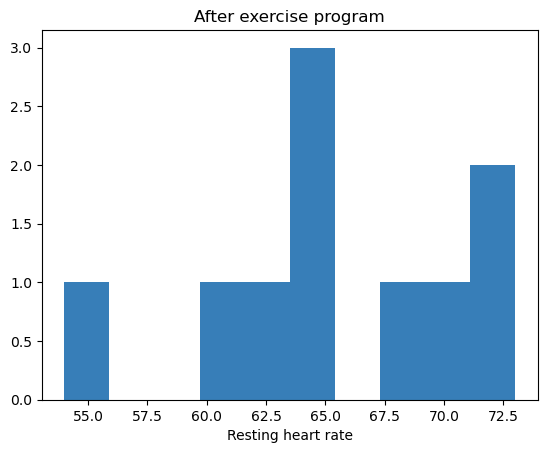

In [203]:
# Plot a heart rate after exercise from the array values
plt.hist(rate_after_exercise, color='#377eb8')

# Add a label to the x-axis
plt.xlabel("Resting heart rate")

# Add a title to the plot
plt.title("After exercise program")

We then tested the normality for the rate after the exercise using Q-Q plot and Shapiro-Wilk test. According to the results, our values came from the normal distribution since they are close to the regression line and the pvalue stays above 0.05. 

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([54, 61, 63, 64, 64, 64, 68, 70, 72, 73])),
 (5.983470823500199, 65.3, 0.9668741669513842))

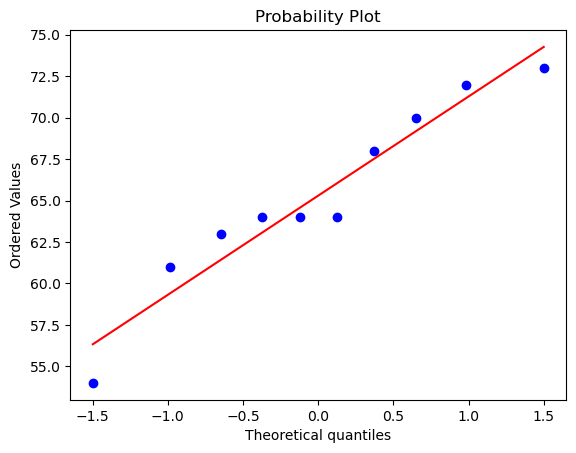

In [204]:
fig, ax = plt.subplots()

# Q-Q plot
stats.probplot(rate_after_exercise, dist='norm', plot=ax)

In [205]:
stats.shapiro(rate_after_exercise)

ShapiroResult(statistic=0.9397047620636736, pvalue=0.5497328687429658)

Text(0.5, 1.0, 'Rate after exercise')

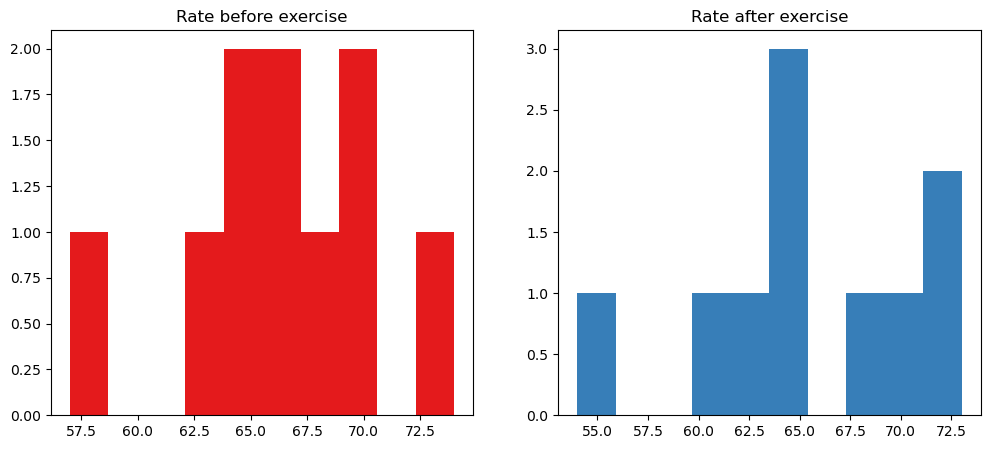

In [206]:
# Plot histograms next to each other for easier comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Resting rate before exercise histogram
ax[0].hist(rate_before_exercise, bins=10, color='#e41a1c')
ax[0].set_title('Rate before exercise')

# Resting rate after exercise histogram
ax[1].hist(rate_after_exercise, bins=10, color='#377eb8')
ax[1].set_title('Rate after exercise')

To get a better sense of how much data overlap, two histograms were plotted on the same set of axes with the purple area showing the overlap. 

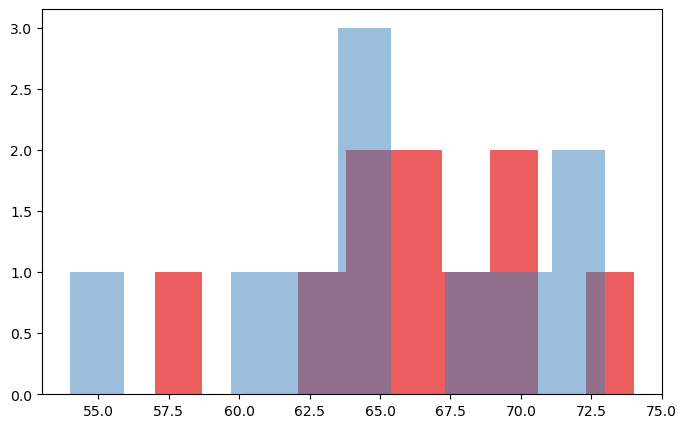

In [207]:
# Create a figure to add histograms
fig, ax = plt.subplots(figsize=(8, 5))

# Resting heart rate before the exercise 
ax.hist(rate_before_exercise, bins=10, color='#e41a1c', alpha=0.7, label='Before exercise')

# Resting heart rate after the exercise 
ax.hist(rate_after_exercise, bins=10, color='#377eb8', alpha=0.5, label='After exercise')

plt.show()

https://python-charts.com/distribution/strip-plot-seaborn/   
https://python-charts.com/distribution/strip-plot-seaborn/  

<Axes: >

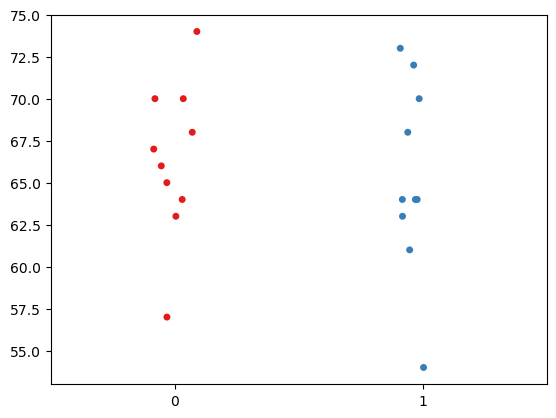

In [208]:
# Create a strip plot
sns.stripplot(data=[rate_before_exercise, rate_after_exercise], palette="Set1")

By looking at the strip plots, we can see there is an overlap in the values, while the values after the exercise are slightly lower than the values before the exercise. In order to get a better visualisation, we created box plots. 

<Axes: >

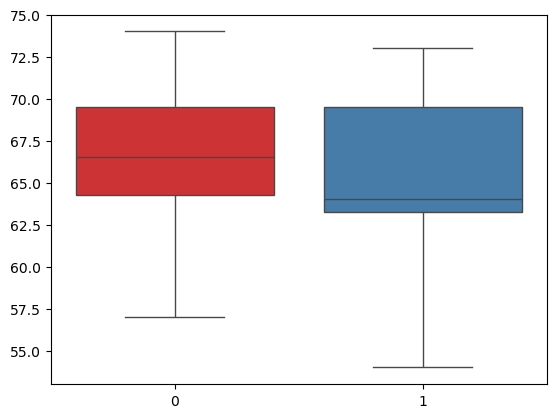

In [209]:
# Create a box plot
sns.boxplot(data=[rate_before_exercise, rate_after_exercise], palette="Set1")

The box plots above are a visual representation of our two groups of data, the red one or the 0 box plot shows the resting heart rate of the patients before exercise program, and the blue or the box plot 1 is showing heart rate after the program. By looking at the plots, we can see that the after exercise one is pulled down compared to the one with rate values before the exercise. The middle value or the median is lower in the after exercise plot. The conclusion we can get by looking at plots is that the values in the interquartile range or the areas in the boxes are very close to each other meaning that the most of the values within the groups are similar and fall in the same range. 

In order to compare the two groups, and test the null hypothesis, we ran the t-test. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel  

In [210]:
stats.ttest_rel(rate_before_exercise, rate_after_exercise)

TtestResult(statistic=1.337227482480628, pvalue=0.21396011317404623, df=9)

After running the t-test for the threshold of pvalue<0.05, we can conclude that there is no statistically significant difference between the groups for the heart rate before and after the two weeks exercise program. In order to test our hypothesis further, we could increase our sample size, and the length of the exercise program to see if there would be any improvement in the measured heart rate. 

To test the normality of differences which is one of the assumptions of the paired samples t-test we subtracted arrays for rates before and after the exercise, created a Q-Q plot and ran the Shapiro-Wilk test. According to the results, the differences follow the normal distribution. 

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-3, -2, -1,  0,  1,  2,  2,  3,  4,  5])),
 (2.8186728968721213, 1.1, 0.9940922242805207))

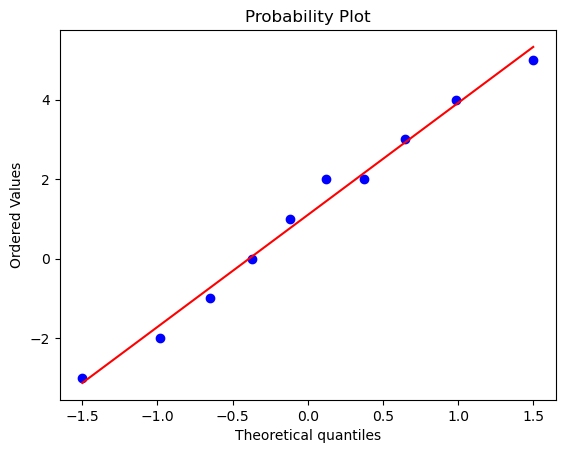

In [ ]:

before_test = np.array(rate_before_exercise)
after_test = np.array(rate_after_exercise)
test = before_test - after_test
fig, ax = plt.subplots()

# Q-Q plot
stats.probplot(test, dist='norm', plot=ax)

In [212]:
stats.shapiro(test)

ShapiroResult(statistic=0.9752339025839639, pvalue=0.9346854448707619)

### 4. ANOVA

Using the variable no_type_ii=0, we estimated the probability to commit a type II error in specific circumstances. 
The test is run 10 000 times using a loop. Three samples with 100 values each are generated using numpy.random.normal with standard deviation of 0.1 and the means: 4.9, 5.0, and 5.1.   
One-way ANOVA is performed on the three samples and 1 is added to no_type_ii when a type II error occurs.   
